# Data Exploration

By: Rodrigo Hernández Mota

This is a basic data exploration analysis.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from util.data_preparation import get_data

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Read Data

In [2]:

data, temporal_validation = get_data()
data["value"] = data["value"].values.astype(np.float)

print("Data shape: {}".format(data.shape))
data.head()

ArgumentError: Could not parse rfc1738 URL from string ''

We have 3 categorical variables (economic_division, gender and age_range) and 7 numerical variables (year, month, t-i) being t-i the lags of the response variable (value). See file time-series.ipynb to visualize the detailed procedure to genarate the lags.

In [5]:
data.describe()

,value,year,month,t-1,t-2,t-3,t-6,t-7
count,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000
mean,6166.021832,2011.291041,6.643093,6147.784647,6128.729642,6109.981541,6056.657289,6039.029838
std,9962.923789,3.010772,3.462530,9938.851516,9913.175466,9888.062591,9815.965221,9791.963616
min,1.000000,2006.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,160.000000,2009.000000,4.000000,159.000000,159.000000,159.000000,158.000000,158.000000
50%,1151.000000,2011.000000,7.000000,1148.000000,1143.000000,1140.000000,1127.000000,1123.000000
75%,7097.500000,2014.000000,10.000000,7070.000000,7042.500000,7022.500000,6956.000000,6947.000000
max,46728.000000,2016.000000,12.000000,46728.000000,46476.000000,46073.000000,45542.000000,45542.000000


The response variable seems to be skew (median != mean). 

In [6]:
# columns

def print_col_info(df, col):
    def get_unique(values):
        desc = "Unique Values: "
        for val in values.unique():
            desc += "\n\t " + val
        return desc
    def get_mean_std(values):
        return "\tMean: " + str(np.mean(values)) + "\n\t Std: " + str(np.std(values))
        
    info = """
    -----------------
    Column: {name}
    
    Data Type: {type}
    Desc:
    {desc}
    """
    values = df[col]
    desc = get_unique(values) if type("") == type(values[0]) else get_mean_std(values)
    print(info.format(
        name=col,
        type=type(values[0]),
        desc=desc
    ))
    

for col in data.columns:
    print_col_info(data, col)


    -----------------
    Column: economic_division
    
    Data Type: <class 'str'>
    Desc:
    Unique Values: 
	 Agricultura, ganadería, silvicultura, pesca y caza
	 Industria eléctrica, captación y suministro de agua potable
	 Industrias de transformación
	 Industrias extractivas
	 Industria de la construcción
	 Transportes y comunicaciones
	 Servicios
	 Comercio
    

    -----------------
    Column: gender
    
    Data Type: <class 'str'>
    Desc:
    Unique Values: 
	 Mujeres
	 Hombres
    

    -----------------
    Column: age_range
    
    Data Type: <class 'str'>
    Desc:
    Unique Values: 
	 De 75 ó más años
	 De 20 a 24 años.
	 De 65 a 69 años.
	 De 15 a 19 años.
	 Menor a 15 años.
	 De 40 a 44 años.
	 De 70 a 74 años.
	 De 30 a 34 años.
	 De 50 a 54 años.
	 De 55 a 59 años.
	 De 35 a 39 años.
	 De 25 a 29 años.
	 De 60 a 64 años.
	 De 45 a 49 años.
    

    -----------------
    Column: value
    
    Data Type: <class 'numpy.float64'>
    Desc:
    	Mean: 6166.

## Basic Exploration

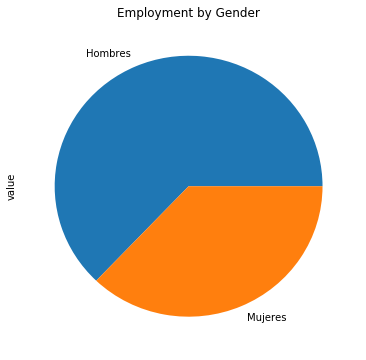

In [7]:
data.groupby("gender").value.sum().plot.pie(figsize=(6, 6))
plt.title("Employment by Gender")
plt.show()

Male population seems to have more employment, although a relative analysis (employment per gender vs gender percentage in population) is needed in order to validate this hypothesis. 

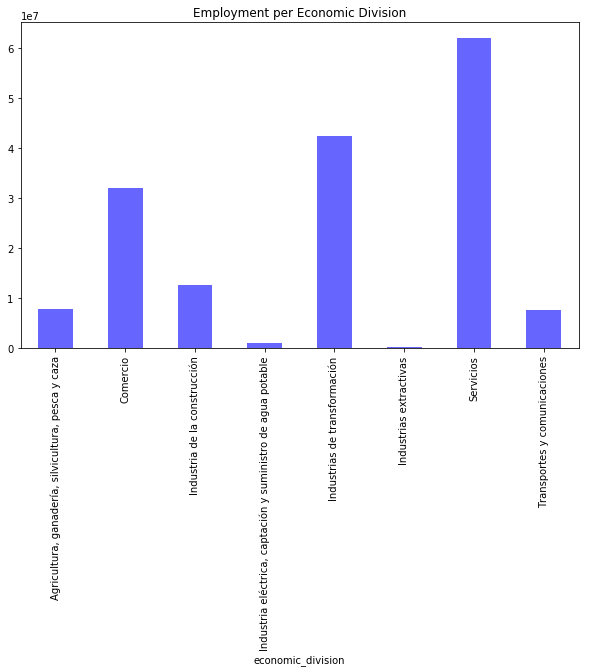

In [16]:
data.groupby("economic_division").value.sum().plot.bar(figsize=(10, 6), color="blue", alpha=0.6)
plt.title("Employment per Economic Division")
plt.show()

The **services industry** seems to have generated more accumulated employment followed by the _transformation industry_ and _commerce_. 

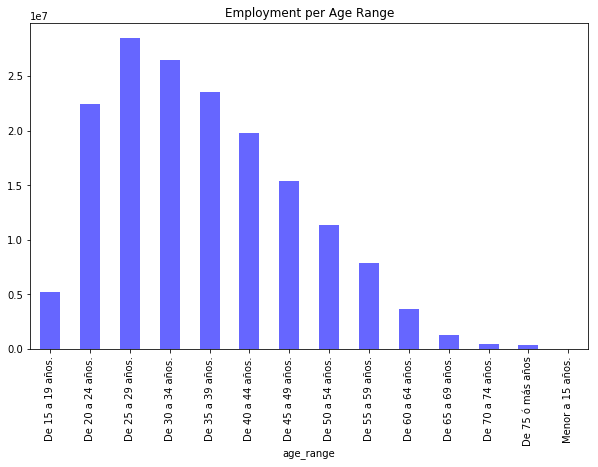

In [15]:
data.groupby("age_range").value.sum().plot.bar(figsize=(10, 6), color="blue", alpha=0.6)
plt.title("Employment per Age Range")
plt.show()

Employment per age seems to follow a gamma distributin. **Age between 25 to 29** years have had more accumulated employment.

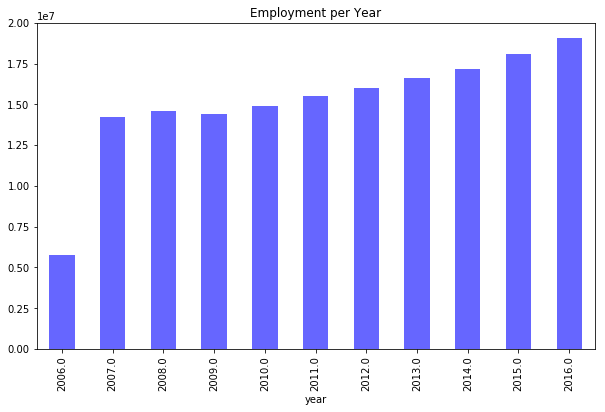

2006 months: [ 8  9 10 11 12]


In [17]:
data.groupby("year").value.sum().plot.bar(figsize=(10, 6), color="blue", alpha=0.6)
plt.title("Employment per Year")
plt.show()

print("2006 months: {}".format(data.query("year == 2006").month.unique()))

The total employment per year shows a positive tendency. The 2006 year is incomplete. 

## Time Series

Insured employment time series.

In [18]:
data["time"] = (data.year  + data.month / 12).values

def df_by_levels(data, column):
    temp = {}
    temp_group = data.groupby(["time", column])[["value"]].sum()
    for element in data[column].unique():
        temp[element] = temp_group.xs(element, level=column).value.values
    return pd.DataFrame(temp, index=data.time.unique())

def plot_by_levels(data, column, title=""):
    df_by_levels(data, column).plot(figsize=(12, 6))
    plt.title(title)
    plt.xlabel("time")
    plt.ylabel("insured employment")
    plt.show()

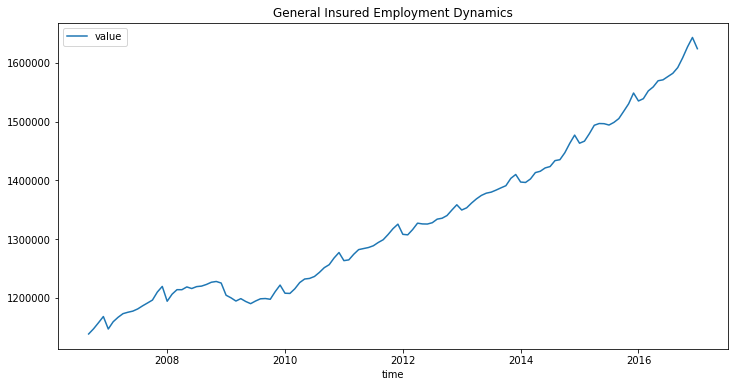

In [19]:
ts = data.groupby("time")[["value"]].sum()
ts.plot(figsize=(12, 6))
plt.title("General Insured Employment Dynamics")
plt.show()

Insured employment has been increasing.

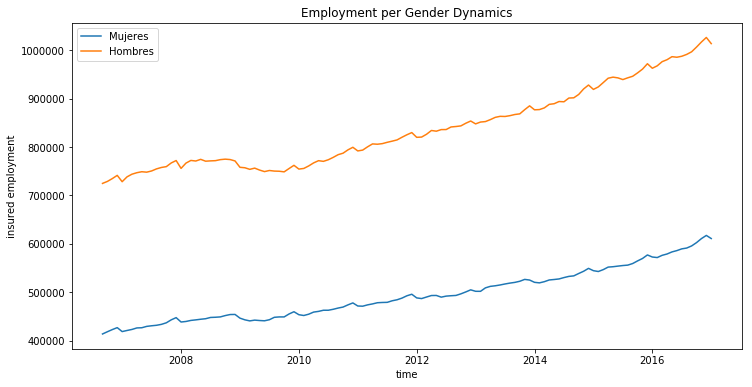

In [20]:
plot_by_levels(data, "gender", title="Employment per Gender Dynamics")

Historically, men have had more insured employment than women (note that a relative analysis is missing). Nonetheless, both genders show a positive trend. 

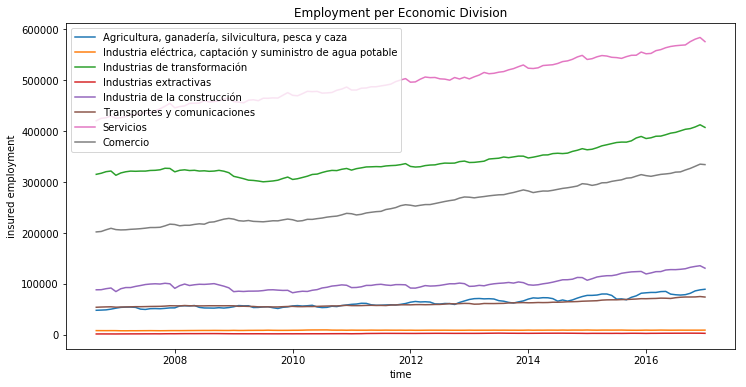

In [21]:
plot_by_levels(data, "economic_division", title="Employment per Economic Division")

As expected due to the previous analysis, the service industry generates the mayor number of insured employment. Furthermore, it seems that the only enconomic divisions that have swapped places are transport and communication with agriculture. 

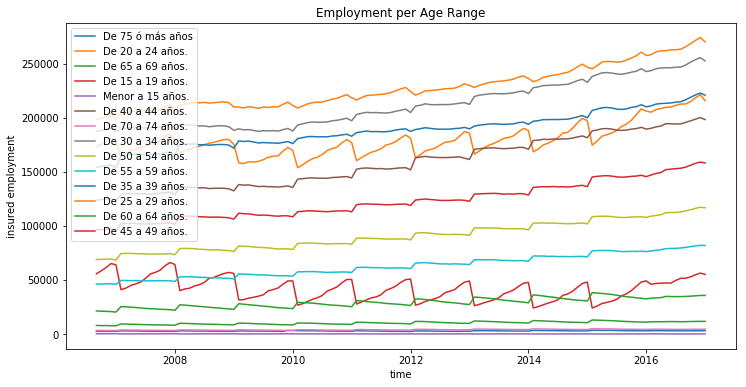

In [22]:
plot_by_levels(data, "age_range", title="Employment per Age Range")

Similar as the previous analysis, age between 25 to 29 stays top. 

## Scatter Plots

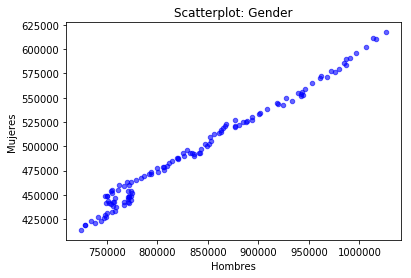

In [23]:
df_by_levels(data, "gender").plot.scatter(x="Hombres", y="Mujeres", color="blue", alpha=0.6)
plt.title("Scatterplot: Gender")
plt.show()

This figure shows visually how an increase of 1 unit of men's employment leads to an increase < 1 but > 0 to the women emplyment.

## Response Variable

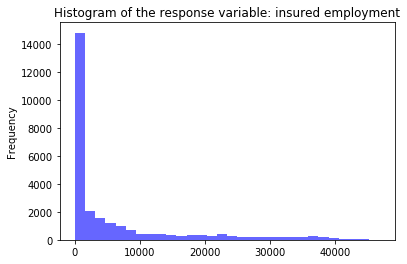

In [24]:
data.value.plot.hist(bins=30, color="blue", alpha=0.6)
plt.title("Histogram of the response variable: insured employment")
plt.show()

Overall, the response distribution of the insured employment looks like an exponential. 

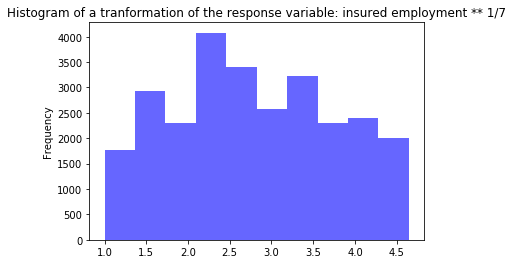

In [25]:
np.power(data.value, 1/7).plot.hist(color="blue", alpha=0.6)
plt.title("Histogram of a tranformation of the response variable: insured employment ** 1/7")
plt.show()